# Data Exploration and Preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deauth/1.Deauth/Deauth_27.csv
/kaggle/input/deauth/1.Deauth/Deauth_21.csv
/kaggle/input/deauth/1.Deauth/Deauth_22.csv
/kaggle/input/deauth/1.Deauth/Deauth_19.csv
/kaggle/input/deauth/1.Deauth/Deauth_2.csv
/kaggle/input/deauth/1.Deauth/Deauth_1.csv
/kaggle/input/deauth/1.Deauth/Deauth_10.csv
/kaggle/input/deauth/1.Deauth/Deauth_16.csv
/kaggle/input/deauth/1.Deauth/Deauth_15.csv
/kaggle/input/deauth/1.Deauth/Deauth_32.csv
/kaggle/input/deauth/1.Deauth/Deauth_6.csv
/kaggle/input/deauth/1.Deauth/Deauth_24.csv
/kaggle/input/deauth/1.Deauth/Deauth_5.csv
/kaggle/input/deauth/1.Deauth/Deauth_30.csv
/kaggle/input/deauth/1.Deauth/Deauth_0.csv
/kaggle/input/deauth/1.Deauth/Deauth_29.csv
/kaggle/input/deauth/1.Deauth/Deauth_25.csv
/kaggle/input/deauth/1.Deauth/Deauth_13.csv
/kaggle/input/deauth/1.Deauth/Deauth_8.csv
/kaggle/input/deauth/1.Deauth/Deauth_20.csv
/kaggle/input/deauth/1.Deauth/Deauth_23.csv
/kaggle/input/deauth/1.Deauth/Deauth_17.csv
/kaggle/input/deauth/1.Deauth/Deauth_2

Uploading only a portion of the AWID dataset, which covers only the 3 attacks we are interested in: Deauth, ARP Spoofing, and Rogue Access Point.

In [2]:
import pandas as pd
import glob

# Define attack categories and their respective paths
attack_paths = {
    "deauth": "/kaggle/input/deauth/1.Deauth/*.csv",
    "rogue_ap": "/kaggle/input/impersonation/4.Rogue_AP/*.csv",
    "website_spoofing": "/kaggle/input/spoofing/13.Website_spoofing/*.csv"
}

# Dictionary to store merged data
merged_data = {}

# Loop through each attack type and merge corresponding CSV files
for attack, path in attack_paths.items():
    all_files = glob.glob(path)  # Get all CSV file paths for the attack type
    df_list = [pd.read_csv(file, low_memory=False) for file in all_files]  # Read all CSVs
    merged_df = pd.concat(df_list, ignore_index=True)  # Merge dataframes
    merged_data[attack] = merged_df  # Store merged dataframe
    print(f"Merged {len(all_files)} files for {attack} attack.")

# Display summary of merged datasets
for attack, df in merged_data.items():
    print(f"\n{attack.upper()} Attack Dataset:")
    print(df.info())  # Display dataset information

Merged 33 files for deauth attack.
Merged 40 files for rogue_ap attack.
Merged 54 files for website_spoofing attack.

DEAUTH Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626469 entries, 0 to 1626468
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(89), int64(22), object(143)
memory usage: 3.1+ GB
None

ROGUE_AP Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973185 entries, 0 to 1973184
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(86), int64(21), object(147)
memory usage: 3.7+ GB
None

WEBSITE_SPOOFING Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668567 entries, 0 to 2668566
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(89), int64(24), object(141)
memory usage: 5.1+ GB
None


In [3]:
# Print column names for the "deauth" dataset (or change to another dataset)
print(merged_data["deauth"].columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.connection_id', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=254)


Distribution of the data, in the 3 datasets, for the 3 types of attacks.

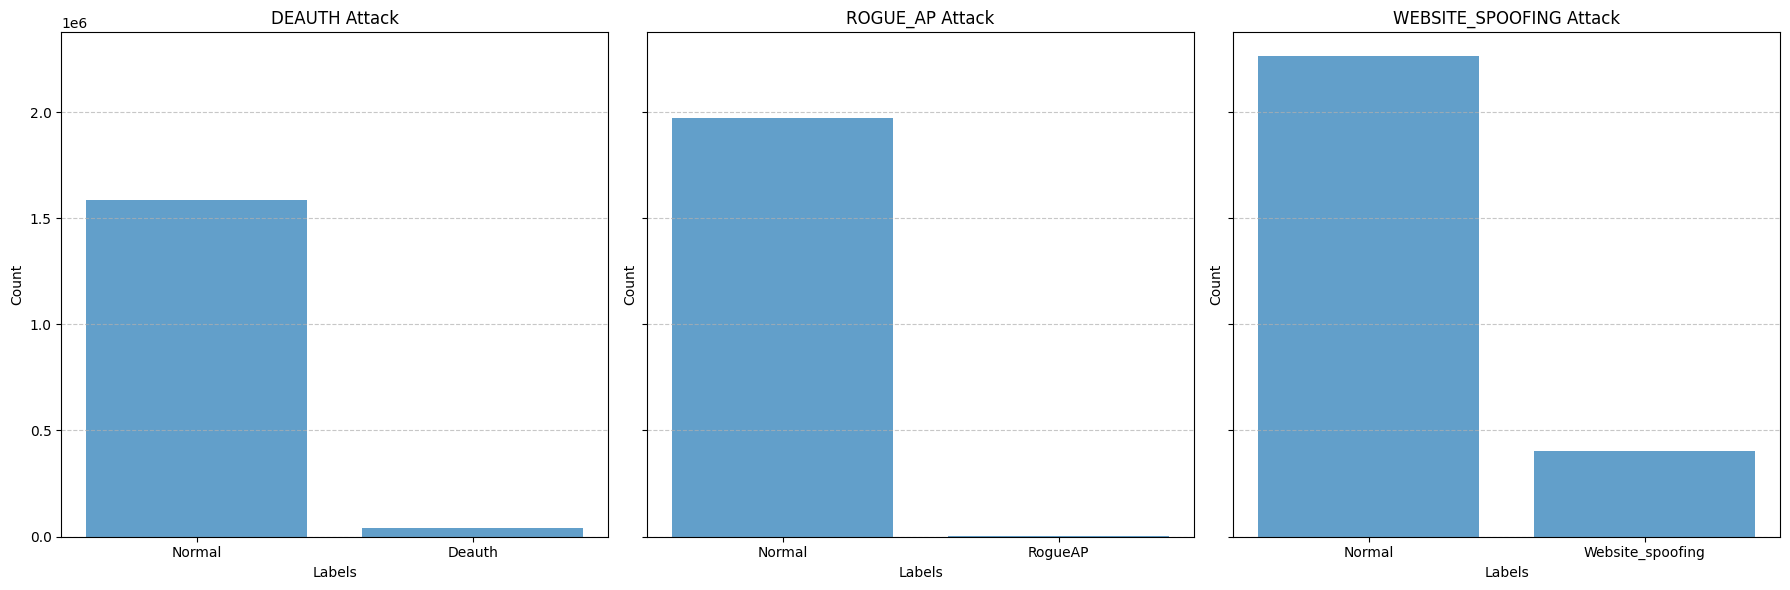

In [4]:
import matplotlib.pyplot as plt

# Define label column name (update if necessary)
label_column = "Label"  # Change this if your dataset has a different column for labels

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each dataset's label distribution in a separate subplot
for ax, (attack, df) in zip(axes, merged_data.items()):
    label_counts = df[label_column].value_counts()
    ax.bar(label_counts.index, label_counts.values, alpha=0.7)
    ax.set_title(f"{attack.upper()} Attack")
    ax.set_xlabel("Labels")
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Handling Missing Values
Checking for Nan Values:

In [5]:
# Check for NaN values in each dataset
for attack, df in merged_data.items():
    nan_counts = df.isna().sum()  # Count NaNs per column
    nan_counts = nan_counts[nan_counts > 0]  # Filter only columns with NaNs
    
    if not nan_counts.empty:
        print(f"\nNaN Values in {attack.upper()} Dataset:")
        print(nan_counts)
    else:
        print(f"\n{attack.upper()} Dataset has no NaN values.")



NaN Values in DEAUTH Dataset:
radiotap.datarate                            536382
radiotap.mactime                             536907
radiotap.vendor_oui                         1626469
wlan.analysis.kck                           1626404
wlan.analysis.kek                           1626404
                                             ...   
tls.handshake.extensions_key_share_group    1622542
tls.handshake.session_ticket_length         1625352
tls.handshake.version                       1621063
tls.record.content_type                     1580606
tls.record.version                          1571025
Length: 220, dtype: int64

NaN Values in ROGUE_AP Dataset:
radiotap.datarate                            703154
radiotap.mactime                             703359
radiotap.vendor_oui                         1973185
wlan.duration                                    35
wlan.analysis.kck                           1973164
                                             ...   
tls.handshake.extensions_k

Elimination all columns that contain more than 10% of Nan Values:

In [6]:
# Define the NaN threshold 
threshold = 0.1

# Get the number of rows in each dataset
num_rows = {attack: len(df) for attack, df in merged_data.items()}

# Identify columns to drop (must exceed threshold in all 3 datasets)
columns_to_drop = set(merged_data["deauth"].columns)  # Start with all columns

for attack, df in merged_data.items():
    nan_ratio = df.isna().sum() / num_rows[attack]  # Get NaN ratio per column
    high_nan_columns = set(nan_ratio[nan_ratio > threshold].index)  # Find high NaN columns
    columns_to_drop &= high_nan_columns  # Keep only columns that exceed the threshold in all datasets

# Print the columns that will be removed
print("Columns removed from all datasets:", columns_to_drop)

# Drop identified columns from each dataset and store separately
deauth_cleaned = merged_data["deauth"].drop(columns=columns_to_drop)
rogue_ap_cleaned = merged_data["rogue_ap"].drop(columns=columns_to_drop)
website_spoofing_cleaned = merged_data["website_spoofing"].drop(columns=columns_to_drop)

# Display summaries of the cleaned datasets
print("\nDEAUTH Cleaned Dataset:")
print(deauth_cleaned.info())

print("\nROGUE AP Cleaned Dataset:")
print(rogue_ap_cleaned.info())

print("\nWEBSITE SPOOFING Cleaned Dataset:")
print(website_spoofing_cleaned.info())


Columns removed from all datasets: {'dns.retransmit_request', 'ssh.mac_algorithms_server_to_client_length', 'wlan.fixed.reason_code', 'tls.handshake.version', 'arp.hw.type', 'tcp.seq', 'http.request.uri.query', 'http.response.code.desc', 'tcp.time_relative', 'wlan.ssid', 'ssh.cookie', 'wlan_rsna_eapol.keydes.key_info.key_mic', 'tcp.analysis.reused_ports', 'tcp.option_len', 'http.request.full_uri', 'wlan.seq', 'dhcp.id', 'ssh.host_key.type_length', 'dns.a', 'ssh.mac_algorithms_client_to_server_length', 'dns.count.auth_rr', 'wlan_rsna_eapol.keydes.msgnr', 'llc', 'http.request.uri.query.parameter', 'tls.alert_message.level', 'wlan.rsn.ie.gtk.key', 'wlan.ta', 'ssh.message_code', 'smb2.host', 'dhcp.hw.mac_addr', 'data.data', 'tls.record.content_type', 'smb.access.generic_execute', 'ssh.kex_algorithms_length', 'wlan.fixed.timestamp', 'wlan.sa', 'smb2.filename', 'http.last_modified', 'dns.id', 'http.response_in', 'json.key', 'arp.proto.size', 'ssh.server_host_key_algorithms_length', 'smb2.cmd

In [7]:
deauth_cleaned.isna().sum()


frame.encap_type               0
frame.len                      0
frame.number                   0
frame.time                     0
frame.time_delta               0
frame.time_delta_displayed     0
frame.time_epoch               0
frame.time_relative            0
radiotap.channel.flags.cck     0
radiotap.channel.flags.ofdm    0
radiotap.channel.freq          0
radiotap.dbm_antsignal         0
radiotap.length                0
radiotap.present.tsft          0
radiotap.rxflags               0
radiotap.timestamp.ts          0
wlan.duration                  0
wlan.fc.ds                     0
wlan.fc.frag                   0
wlan.fc.order                  0
wlan.fc.moredata               0
wlan.fc.protected              0
wlan.fc.pwrmgt                 0
wlan.fc.type                   0
wlan.fc.retry                  0
wlan.fc.subtype                0
wlan.ra                        0
wlan_radio.duration            0
wlan_radio.channel             0
wlan_radio.data_rate           0
wlan_radio

In [12]:
rogue_ap_cleaned.isna().sum()

frame.encap_type                0
frame.len                       0
frame.number                    0
frame.time                      0
frame.time_delta                0
frame.time_delta_displayed      0
frame.time_epoch                0
frame.time_relative             0
radiotap.channel.flags.cck      0
radiotap.channel.flags.ofdm     0
radiotap.channel.freq           0
radiotap.dbm_antsignal          0
radiotap.length                 0
radiotap.present.tsft           0
radiotap.rxflags                0
radiotap.timestamp.ts           0
wlan.duration                  35
wlan.fc.ds                      0
wlan.fc.frag                    0
wlan.fc.order                   0
wlan.fc.moredata                0
wlan.fc.protected               0
wlan.fc.pwrmgt                  0
wlan.fc.type                    0
wlan.fc.retry                   0
wlan.fc.subtype                 0
wlan.ra                         0
wlan_radio.duration             0
wlan_radio.channel              0
wlan_radio.dat

In [13]:
website_spoofing_cleaned.isna().sum()

frame.encap_type               0
frame.len                      0
frame.number                   0
frame.time                     0
frame.time_delta               0
frame.time_delta_displayed     0
frame.time_epoch               0
frame.time_relative            0
radiotap.channel.flags.cck     0
radiotap.channel.flags.ofdm    0
radiotap.channel.freq          0
radiotap.dbm_antsignal         0
radiotap.length                0
radiotap.present.tsft          0
radiotap.rxflags               0
radiotap.timestamp.ts          0
wlan.duration                  0
wlan.fc.ds                     0
wlan.fc.frag                   0
wlan.fc.order                  0
wlan.fc.moredata               0
wlan.fc.protected              0
wlan.fc.pwrmgt                 0
wlan.fc.type                   0
wlan.fc.retry                  0
wlan.fc.subtype                0
wlan.ra                        0
wlan_radio.duration            0
wlan_radio.channel             0
wlan_radio.data_rate           0
wlan_radio

 Dropping the few remaining rows that contain some Nan values:

In [8]:
# Remove rows with NaN values in rogue_ap_cleaned
rogue_ap_cleaned = rogue_ap_cleaned.dropna()

# Verify that there are no more NaN values
print("\nNaN values remaining in ROGUE AP dataset after cleaning:")
print(rogue_ap_cleaned.isna().sum().sum())  # Should print 0

# Display the updated dataset info
print("\nUpdated ROGUE AP Cleaned Dataset:")
print(rogue_ap_cleaned.info())


NaN values remaining in ROGUE AP dataset after cleaning:
0

Updated ROGUE AP Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1973150 entries, 0 to 1973184
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   frame.encap_type             int64  
 1   frame.len                    int64  
 2   frame.number                 int64  
 3   frame.time                   object 
 4   frame.time_delta             float64
 5   frame.time_delta_displayed   float64
 6   frame.time_epoch             float64
 7   frame.time_relative          float64
 8   radiotap.channel.flags.cck   int64  
 9   radiotap.channel.flags.ofdm  int64  
 10  radiotap.channel.freq        int64  
 11  radiotap.dbm_antsignal       object 
 12  radiotap.length              int64  
 13  radiotap.present.tsft        object 
 14  radiotap.rxflags             object 
 15  radiotap.timestamp.ts        int64  
 16  wlan.duration                float64

### Feature Selection

dropping columns that do not contain any variations:

In [9]:
# Function to find constant columns in a dataset
def find_constant_columns(df, dataset_name):
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    print(f"\nConstant Columns in {dataset_name.upper()} Dataset:")
    if constant_columns:
        print(constant_columns)
    else:
        print("No constant columns found.")
    return constant_columns

# Check for constant columns in each cleaned dataset
deauth_constant_cols = find_constant_columns(deauth_cleaned, "Deauth")
rogue_ap_constant_cols = find_constant_columns(rogue_ap_cleaned, "Rogue AP")
website_spoofing_constant_cols = find_constant_columns(website_spoofing_cleaned, "Website Spoofing")

# Decide if we should remove them
remove_columns = set(deauth_constant_cols) & set(rogue_ap_constant_cols) & set(website_spoofing_constant_cols)

if remove_columns:
    print("\nColumns that are constant in ALL datasets and can be removed:", remove_columns)
else:
    print("\nNo constant columns are found in all datasets.")


Constant Columns in DEAUTH Dataset:
['frame.encap_type', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.rxflags', 'wlan_radio.channel', 'wlan_radio.frequency']

Constant Columns in ROGUE AP Dataset:
['frame.encap_type', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.rxflags', 'wlan_radio.channel', 'wlan_radio.frequency']

Constant Columns in WEBSITE SPOOFING Dataset:
['frame.encap_type', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.rxflags', 'wlan_radio.channel', 'wlan_radio.frequency']

Columns that are constant in ALL datasets and can be removed: {'wlan_radio.channel', 'wlan_radio.frequency', 'radiotap.channel.freq', 'radiotap.rxflags', 'radiotap.channel.flags.ofdm', 'frame.encap_type', 'radiotap.channel.flags.cck'}


In [10]:
# Remove the constant columns from all datasets
deauth_cleaned = deauth_cleaned.drop(columns=remove_columns)
rogue_ap_cleaned = rogue_ap_cleaned.drop(columns=remove_columns)
website_spoofing_cleaned = website_spoofing_cleaned.drop(columns=remove_columns)

# Print confirmation
print("\nRemoved the following constant columns from all datasets:")
print(remove_columns)

# Display the new shape of each dataset after removal
print("\nUpdated Dataset Shapes:")
print(f"Deauth Dataset: {deauth_cleaned.shape}")
print(f"Rogue AP Dataset: {rogue_ap_cleaned.shape}")
print(f"Website Spoofing Dataset: {website_spoofing_cleaned.shape}")


Removed the following constant columns from all datasets:
{'wlan_radio.channel', 'wlan_radio.frequency', 'radiotap.channel.freq', 'radiotap.rxflags', 'radiotap.channel.flags.ofdm', 'frame.encap_type', 'radiotap.channel.flags.cck'}

Updated Dataset Shapes:
Deauth Dataset: (1626469, 27)
Rogue AP Dataset: (1973150, 27)
Website Spoofing Dataset: (2668567, 27)


Dropping columns that would not contribute in the learning of the models, columns that represent the exact time or the mac address for example are not relevant, and should not be used in training any model.
Also, converting columns to numerical, preparing the data for modeling.

In [11]:
import pandas as pd

columns_to_drop = [
    "frame.time",  # Timestamp (not useful for model training)
    "wlan.ra",  # MAC address (too unique, not a good feature)
    "radiotap.dbm_antsignal",  # Signal strength (if object, needs conversion but often missing)
    "radiotap.present.tsft"  # Unknown object column, possibly redundant
]

# Function to preprocess the dataset
def preprocess_dataset(df):
    # Drop unnecessary columns
    df = df.drop(columns=columns_to_drop, errors="ignore")

    # Convert categorical columns (if any remain) to numeric
    categorical_columns = df.select_dtypes(include=["object"]).columns

    for col in categorical_columns:
        df[col] = pd.factorize(df[col])[0]  # Convert categorical to integer values

    # Fill any remaining NaN values with median (better than mean for outliers)
    df = df.fillna(df.median(numeric_only=True))

    return df

# Apply preprocessing to each cleaned dataset
deauth_cleaned = preprocess_dataset(deauth_cleaned)
rogue_ap_cleaned = preprocess_dataset(rogue_ap_cleaned)
website_spoofing_cleaned = preprocess_dataset(website_spoofing_cleaned)

# Print updated dataset info
print("\nUpdated Dataset Info After Preprocessing:")
print("\nDeauth Dataset:\n", deauth_cleaned.info())
print("\nRogue AP Dataset:\n", rogue_ap_cleaned.info())
print("\nWebsite Spoofing Dataset:\n", website_spoofing_cleaned.info())



Updated Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626469 entries, 0 to 1626468
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   frame.len                   1626469 non-null  int64  
 1   frame.number                1626469 non-null  int64  
 2   frame.time_delta            1626469 non-null  float64
 3   frame.time_delta_displayed  1626469 non-null  float64
 4   frame.time_epoch            1626469 non-null  float64
 5   frame.time_relative         1626469 non-null  float64
 6   radiotap.length             1626469 non-null  int64  
 7   radiotap.timestamp.ts       1626469 non-null  int64  
 8   wlan.duration               1626469 non-null  int64  
 9   wlan.fc.ds                  1626469 non-null  int64  
 10  wlan.fc.frag                1626469 non-null  int64  
 11  wlan.fc.order               1626469 non-null  int64  
 12  wlan.fc.mored

### Train and Test Balanced Splitting

In [12]:
from sklearn.model_selection import train_test_split

# Define train-test split ratio
test_size = 0.2  # 20% for testing

# Define the label column (update if necessary)
label_column = "Label"  # Change if your label column has a different name

# Splitting Deauth dataset with stratification
deauth_train, deauth_test = train_test_split(
    deauth_cleaned, test_size=test_size, random_state=42, stratify=deauth_cleaned[label_column]
)

# Splitting Rogue AP dataset with stratification
rogue_ap_train, rogue_ap_test = train_test_split(
    rogue_ap_cleaned, test_size=test_size, random_state=42, stratify=rogue_ap_cleaned[label_column]
)

# Splitting Website Spoofing dataset with stratification
website_spoofing_train, website_spoofing_test = train_test_split(
    website_spoofing_cleaned, test_size=test_size, random_state=42, stratify=website_spoofing_cleaned[label_column]
)

# Print the new dataset sizes
print("\nTrain-Test Split Sizes:")
print(f"Deauth - Train: {deauth_train.shape}, Test: {deauth_test.shape}")
print(f"Rogue AP - Train: {rogue_ap_train.shape}, Test: {rogue_ap_test.shape}")
print(f"Website Spoofing - Train: {website_spoofing_train.shape}, Test: {website_spoofing_test.shape}")

# Check label distribution before and after splitting
print("\nLabel Distribution in Train and Test Sets:")
for dataset_name, df_train, df_test in [
    ("Deauth", deauth_train, deauth_test),
    ("Rogue AP", rogue_ap_train, rogue_ap_test),
    ("Website Spoofing", website_spoofing_train, website_spoofing_test)
]:
    print(f"\n{dataset_name} Dataset:")
    print("Train Labels:\n", df_train[label_column].value_counts(normalize=True))
    print("Test Labels:\n", df_test[label_column].value_counts(normalize=True))


Train-Test Split Sizes:
Deauth - Train: (1301175, 23), Test: (325294, 23)
Rogue AP - Train: (1578520, 23), Test: (394630, 23)
Website Spoofing - Train: (2134853, 23), Test: (533714, 23)

Label Distribution in Train and Test Sets:

Deauth Dataset:
Train Labels:
 Label
0    0.976057
1    0.023943
Name: proportion, dtype: float64
Test Labels:
 Label
0    0.976059
1    0.023941
Name: proportion, dtype: float64

Rogue AP Dataset:
Train Labels:
 Label
0    0.999336
1    0.000664
Name: proportion, dtype: float64
Test Labels:
 Label
0    0.999336
1    0.000664
Name: proportion, dtype: float64

Website Spoofing Dataset:
Train Labels:
 Label
0    0.848188
1    0.151812
Name: proportion, dtype: float64
Test Labels:
 Label
0    0.848188
1    0.151812
Name: proportion, dtype: float64


In [13]:
# Save individual datasets before merging
deauth_train.to_csv("deauth_train.csv", index=False)
deauth_test.to_csv("deauth_test.csv", index=False)

rogue_ap_train.to_csv("rogue_ap_train.csv", index=False)
rogue_ap_test.to_csv("rogue_ap_test.csv", index=False)

website_spoofing_train.to_csv("website_spoofing_train.csv", index=False)
website_spoofing_test.to_csv("website_spoofing_test.csv", index=False)

print("✅ All datasets saved as CSV files successfully!")

✅ All datasets saved as CSV files successfully!


# Model Training

In [10]:
import pandas as pd

# Read the saved datasets into DataFrames
deauth_train = pd.read_csv("/kaggle/input/preporcessed-awid/deauth_train.csv")
deauth_test = pd.read_csv("/kaggle/input/preporcessed-awid/deauth_test.csv")

rogue_ap_train = pd.read_csv("/kaggle/input/preporcessed-awid/rogue_ap_train.csv")
rogue_ap_test = pd.read_csv("/kaggle/input/preporcessed-awid/rogue_ap_test.csv")

website_spoofing_train = pd.read_csv("/kaggle/input/preporcessed-awid/website_spoofing_train.csv")
website_spoofing_test = pd.read_csv("/kaggle/input/preporcessed-awid/website_spoofing_test.csv")

print("✅ All datasets loaded into DataFrames successfully!")


✅ All datasets loaded into DataFrames successfully!


In [11]:
deauth_train.head()

,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.length,radiotap.timestamp.ts,wlan.duration,wlan.fc.ds,...,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan_radio.duration,wlan_radio.data_rate,wlan_radio.signal_dbm,wlan_radio.phy,Label
0,76,851588,0.000374,0.000374,1.608307e+09,374.199770,56,3398256583,166,0,...,0,0,1,0,11,28,24.0,-36,5,0
1,79,750844,0.000546,0.000546,1.608307e+09,349.480781,56,3373537851,100,0,...,0,0,1,0,5,32,24.0,-36,5,0
2,170,367933,0.000041,0.000041,1.608306e+09,273.278296,64,3297336204,48,1,...,1,0,2,0,8,45,156.0,-53,8,0
3,86,1174991,0.003503,0.003503,1.608307e+09,458.449472,56,3482505273,320,0,...,0,0,0,0,12,64,6.0,-44,5,1
4,88,531243,0.000111,0.000111,1.608306e+09,304.653208,56,3328710783,62,0,...,0,0,1,0,9,32,24.0,-36,5,0


### Binary Model Training for the three attacks seperately

started with a simple model like Random forest, since the model will be deployed in a real-time system, and it needs to be efficient and interpretable.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the label column (update if necessary)
label_column = "Label"  # Update this if your label column has a different name

# Function to train and evaluate a model for each dataset
def train_and_evaluate_model(X_train, y_train, X_test, y_test, dataset_name):
    print(f"\n🔵 Training Model for {dataset_name} Attack Detection...")

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n🔹 {dataset_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return model  # Return the trained model for later use if needed

# Prepare train & test sets for each dataset
datasets = {
    "Deauth": (deauth_train, deauth_test),
    "Rogue AP": (rogue_ap_train, rogue_ap_test),
    "Website Spoofing": (website_spoofing_train, website_spoofing_test)
}

trained_models = {}  # Store trained models

for dataset_name, (train_df, test_df) in datasets.items():
    # Separate features (X) and labels (y)
    X_train, y_train = train_df.drop(columns=[label_column]), train_df[label_column]
    X_test, y_test = test_df.drop(columns=[label_column]), test_df[label_column]

    # Train and evaluate the model
    trained_models[dataset_name] = train_and_evaluate_model(X_train, y_train, X_test, y_test, dataset_name)



🔵 Training Model for Deauth Attack Detection...

🔹 Deauth Model Performance:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    317506
           1       1.00      1.00      1.00      7788

    accuracy                           1.00    325294
   macro avg       1.00      1.00      1.00    325294
weighted avg       1.00      1.00      1.00    325294


🔵 Training Model for Rogue AP Attack Detection...

🔹 Rogue AP Model Performance:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    394368
           1       1.00      1.00      1.00       262

    accuracy                           1.00    394630
   macro avg       1.00      1.00      1.00    394630
weighted avg       1.00      1.00      1.00    394630


🔵 Training Model for Website Spoofing Attack Detection...

🔹 Website Spoofing Model Performance:
Accura


🟢 Confusion Matrix for Deauth Attack Detection:


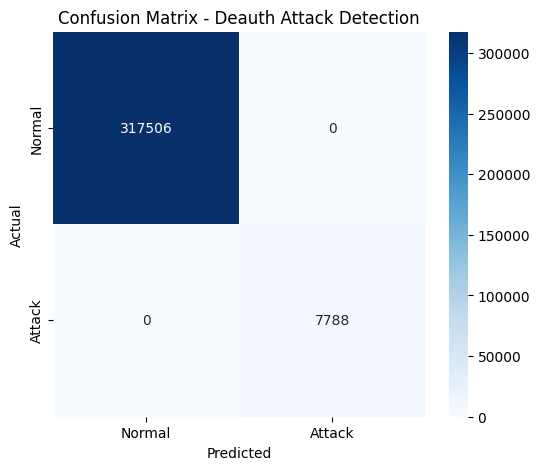


🟢 Confusion Matrix for Rogue AP Attack Detection:


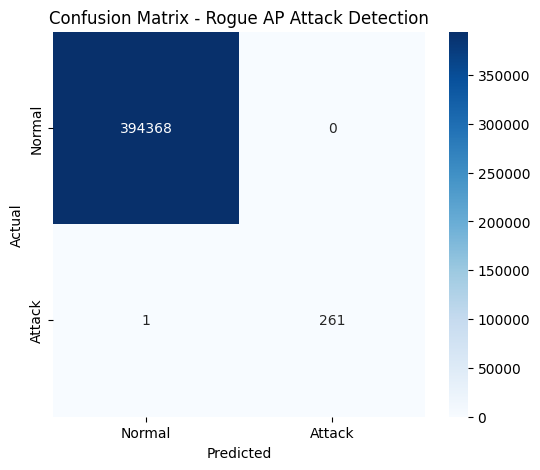


🟢 Confusion Matrix for Website Spoofing Attack Detection:


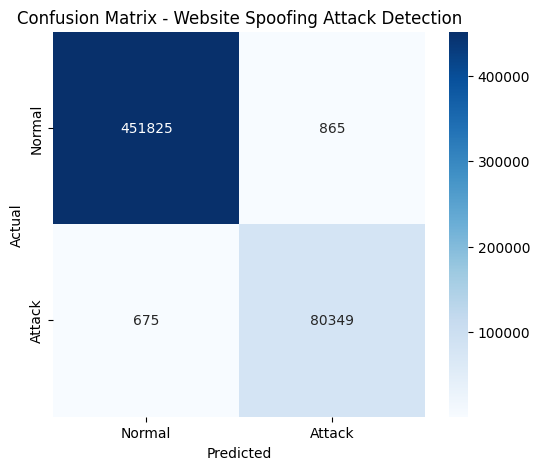

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {dataset_name} Attack Detection")
    plt.show()

# Generate confusion matrices for each dataset
for dataset_name, model in trained_models.items():
    train_df, test_df = datasets[dataset_name]
    X_test, y_test = test_df.drop(columns=[label_column]), test_df[label_column]
    y_pred = model.predict(X_test)
    
    print(f"\n🟢 Confusion Matrix for {dataset_name} Attack Detection:")
    plot_confusion_matrix(y_test, y_pred, dataset_name)

### Multi-class Model for detecting normal, or malicious attack by specifying the type of the attack

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

label_column = 'Label'

# ✅ Function to assign specific attack name (instead of generic "Attack")
def update_labels(df, attack_name):
    df = df.copy()
    df[label_column] = df[label_column].apply(lambda x: attack_name if x == 1 else "Normal")
    return df

# ✅ Apply to each dataset
deauth_train = update_labels(deauth_train, "Deauth_Attack")
deauth_test = update_labels(deauth_test, "Deauth_Attack")

rogue_ap_train = update_labels(rogue_ap_train, "Rogue_AP_Attack")
rogue_ap_test = update_labels(rogue_ap_test, "Rogue_AP_Attack")

website_spoofing_train = update_labels(website_spoofing_train, "Website_Spoofing_Attack")
website_spoofing_test = update_labels(website_spoofing_test, "Website_Spoofing_Attack")

# ✅ Merge all datasets
merged_train_df = pd.concat([deauth_train, rogue_ap_train, website_spoofing_train], ignore_index=True)
merged_test_df = pd.concat([deauth_test, rogue_ap_test, website_spoofing_test], ignore_index=True)

# ✅ Show unique labels before training
print("\n✅ Unique labels in training set:", merged_train_df[label_column].unique())
print("✅ Unique labels in test set:", merged_test_df[label_column].unique())

# ✅ Separate features and labels
X_train_merged = merged_train_df.drop(columns=[label_column])
y_train_merged = merged_train_df[label_column]
X_test_merged = merged_test_df.drop(columns=[label_column])
y_test_merged = merged_test_df[label_column]



✅ Unique labels in training set: ['Normal' 'Deauth_Attack' 'Rogue_AP_Attack' 'Website_Spoofing_Attack']
✅ Unique labels in test set: ['Normal' 'Deauth_Attack' 'Rogue_AP_Attack' 'Website_Spoofing_Attack']



🔵 Training Model on Merged Dataset...

🔹 Merged Dataset Model Performance:
Accuracy: 0.9988
Classification Report:
                          precision    recall  f1-score   support

          Deauth_Attack       1.00      1.00      1.00      7788
                 Normal       1.00      1.00      1.00   1164564
        Rogue_AP_Attack       1.00      1.00      1.00       262
Website_Spoofing_Attack       0.99      0.99      0.99     81024

               accuracy                           1.00   1253638
              macro avg       1.00      1.00      1.00   1253638
           weighted avg       1.00      1.00      1.00   1253638


🟢 Confusion Matrix for Merged Dataset Attack Detection:


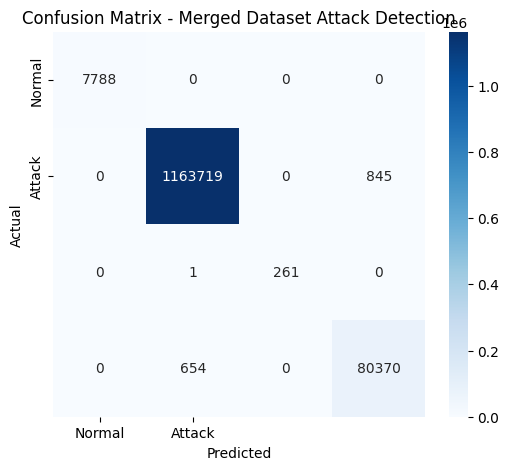

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Train and evaluate the model on the merged dataset
print("\n🔵 Training Model on Merged Dataset...")
merged_model = RandomForestClassifier(n_estimators=100, random_state=42)
merged_model.fit(X_train_merged, y_train_merged)

# Make predictions
y_pred_merged = merged_model.predict(X_test_merged)

# Evaluate performance
accuracy_merged = accuracy_score(y_test_merged, y_pred_merged)
report_merged = classification_report(y_test_merged, y_pred_merged)

print(f"\n🔹 Merged Dataset Model Performance:")
print(f"Accuracy: {accuracy_merged:.4f}")
print("Classification Report:\n", report_merged)


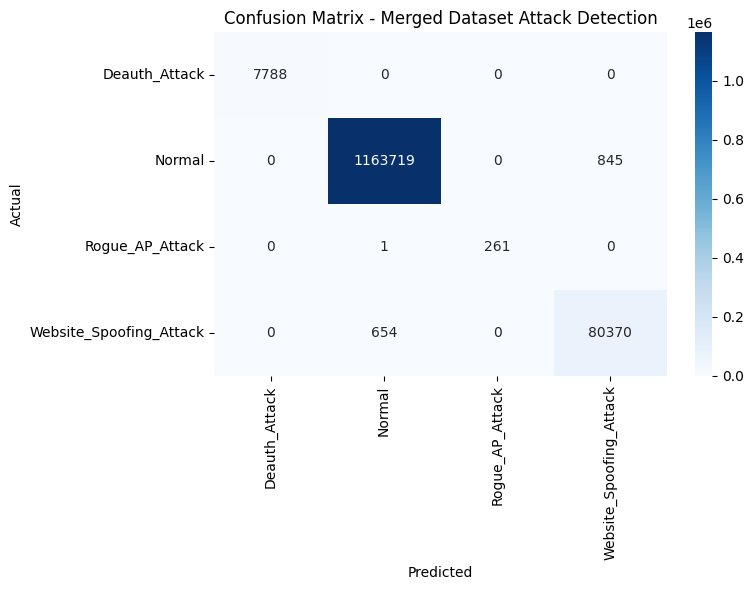

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, dataset_name):
    labels = sorted(np.unique(list(y_true) + list(y_pred)))  # Get all unique labels
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {dataset_name} Attack Detection")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test_merged, y_pred_merged, "Merged Dataset")


### Feature Importance for a more efficient model

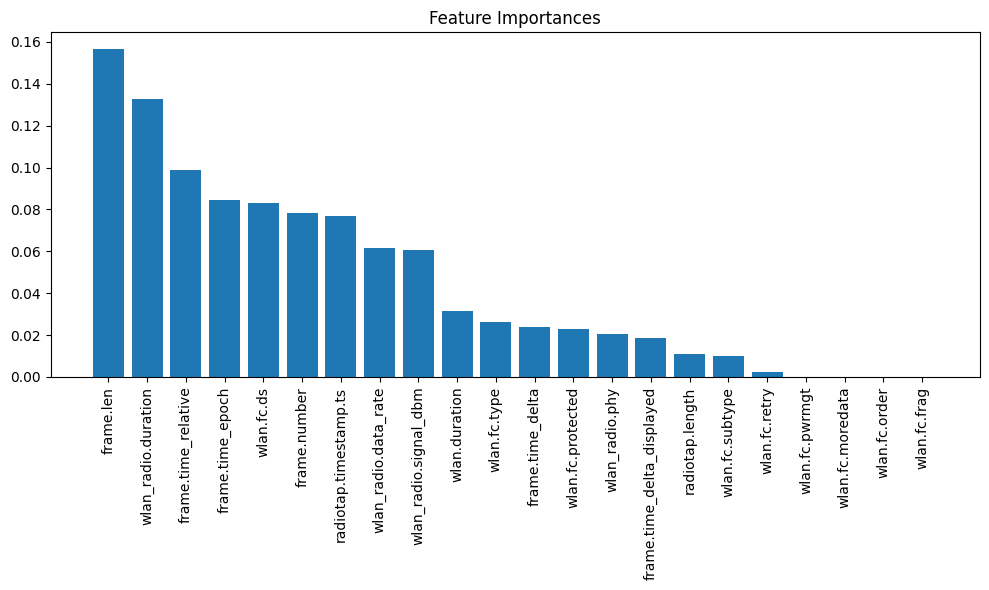

In [15]:
import matplotlib.pyplot as plt

importances = merged_model.feature_importances_
features = X_train_merged.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


dropping low importance features, which didn't contribute at all in the classification.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🔻 Features we want to drop
low_importance_features = [
    "wlan.fc.pwmgmt",
    "wlan.fc.moredata",
    "wlan.fc.order",
    "wlan.fc.frag"
]

# ✅ Drop from train and test sets
X_train_reduced = X_train_merged.drop(columns=low_importance_features, errors='ignore')
X_test_reduced = X_test_merged.drop(columns=low_importance_features, errors='ignore')


training the model again with less features:


📈 Accuracy Scores:
Train Accuracy: 0.9967
Test Accuracy : 0.9966

📋 Classification Report (Test Set):
                         precision    recall  f1-score   support

          Deauth_Attack       1.00      1.00      1.00      7788
                 Normal       1.00      1.00      1.00   1164564
        Rogue_AP_Attack       1.00      1.00      1.00       262
Website_Spoofing_Attack       0.95      1.00      0.97     81024

               accuracy                           1.00   1253638
              macro avg       0.99      1.00      0.99   1253638
           weighted avg       1.00      1.00      1.00   1253638



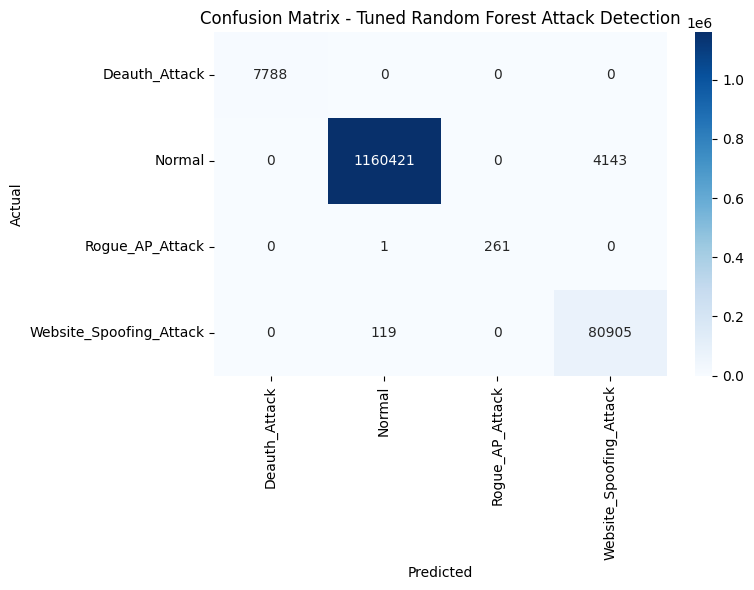

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🎯 Train Random Forest with tuned hyperparameters
tuned_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    class_weight="balanced",  # Handles class imbalance
    random_state=42,
    n_jobs=-1
)

# 🔁 Fit the model on reduced feature set
tuned_model.fit(X_train_reduced, y_train_merged)

# 🧠 Predictions
y_train_pred = tuned_model.predict(X_train_reduced)
y_test_pred = tuned_model.predict(X_test_reduced)

# 📊 Evaluate performance
train_accuracy = accuracy_score(y_train_merged, y_train_pred)
test_accuracy = accuracy_score(y_test_merged, y_test_pred)

print("\n📈 Accuracy Scores:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test_merged, y_test_pred))

# 🌀 Plot updated confusion matrix
plot_confusion_matrix(y_test_merged, y_test_pred, "Tuned Random Forest")

turning parameters aiming for a better perfomance:


📈 Accuracy Scores:
Train Accuracy: 0.9997
Test Accuracy : 0.9987

📋 Classification Report (Test Set):
                         precision    recall  f1-score   support

          Deauth_Attack       1.00      1.00      1.00      7788
                 Normal       1.00      1.00      1.00   1164564
        Rogue_AP_Attack       1.00      1.00      1.00       262
Website_Spoofing_Attack       0.99      0.99      0.99     81024

               accuracy                           1.00   1253638
              macro avg       1.00      1.00      1.00   1253638
           weighted avg       1.00      1.00      1.00   1253638



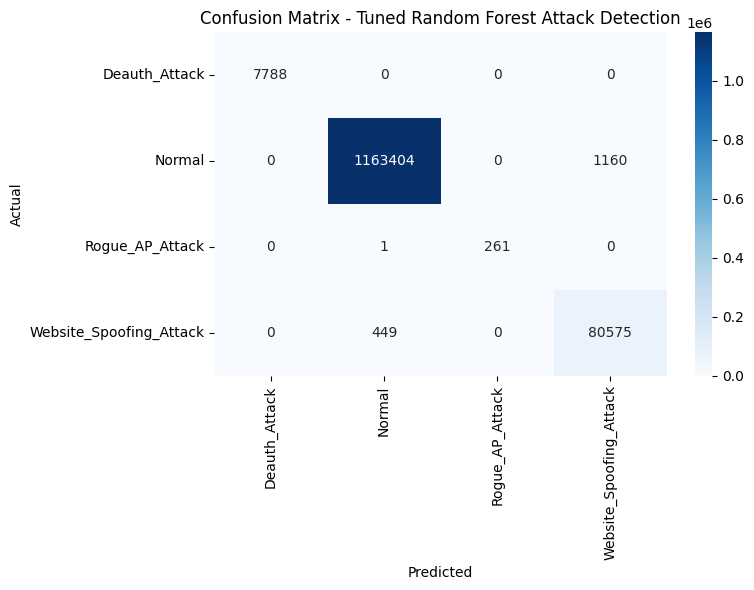

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 🎯 Train Random Forest with tuned hyperparameters
tuned_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    class_weight="balanced",  # Handles class imbalance
    random_state=42,
)

# 🔁 Fit the model on reduced feature set
tuned_model.fit(X_train_reduced, y_train_merged)

# 🧠 Predictions
y_train_pred = tuned_model.predict(X_train_reduced)
y_test_pred = tuned_model.predict(X_test_reduced)

# 📊 Evaluate performance
train_accuracy = accuracy_score(y_train_merged, y_train_pred)
test_accuracy = accuracy_score(y_test_merged, y_test_pred)

print("\n📈 Accuracy Scores:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test_merged, y_test_pred))

# 🌀 Plot updated confusion matrix
plot_confusion_matrix(y_test_merged, y_test_pred, "Tuned Random Forest")

### Saving the model

In [34]:
!pip install joblib

In [35]:
import joblib

# 💾 Save the trained model to a file
joblib.dump(tuned_model, "random_forest_attack_classifier.joblib")

print("✅ Random Forest model saved as 'random_forest_attack_classifier.joblib'")


✅ Random Forest model saved as 'random_forest_attack_classifier.joblib'


In [37]:
import pickle

# 💾 Save the model to a .pkl file
with open("random_forest_attack_classifier.pkl", "wb") as file:
    pickle.dump(tuned_model, file)

print("✅ Random Forest model saved as 'random_forest_attack_classifier.pkl'")

✅ Random Forest model saved as 'random_forest_attack_classifier.pkl'


In [38]:
# 🔁 Load the model from the .pkl file
with open("random_forest_attack_classifier.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# ✅ Use it
predictions = loaded_model.predict(X_test_reduced)

### Training a different model:

In [20]:
!pip install lightgbm

In [33]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Convert string labels → numeric (only once)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_merged)
y_test_enc = le.transform(y_test_merged)

# Use the encoded labels here
train_data = lgb.Dataset(X_train_reduced, label=y_train_enc)
test_data = lgb.Dataset(X_test_reduced, label=y_test_enc)

# ✅ LightGBM Parameters (you can tune later)
params = {
    'objective': 'multiclass',
    'num_class': len(set(y_train_merged)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': 15,
    'num_leaves': 50,
    'verbose': -1
}

# 🔧 Train the model
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=200
)


📈 LightGBM Evaluation
Accuracy: 0.9965620059379183
Classification Report:
                          precision    recall  f1-score   support

          Deauth_Attack       0.98      0.99      0.98      7788
                 Normal       1.00      1.00      1.00   1164564
        Rogue_AP_Attack       0.00      0.00      0.00       262
Website_Spoofing_Attack       0.97      0.98      0.98     81024

               accuracy                           1.00   1253638
              macro avg       0.74      0.74      0.74   1253638
           weighted avg       1.00      1.00      1.00   1253638



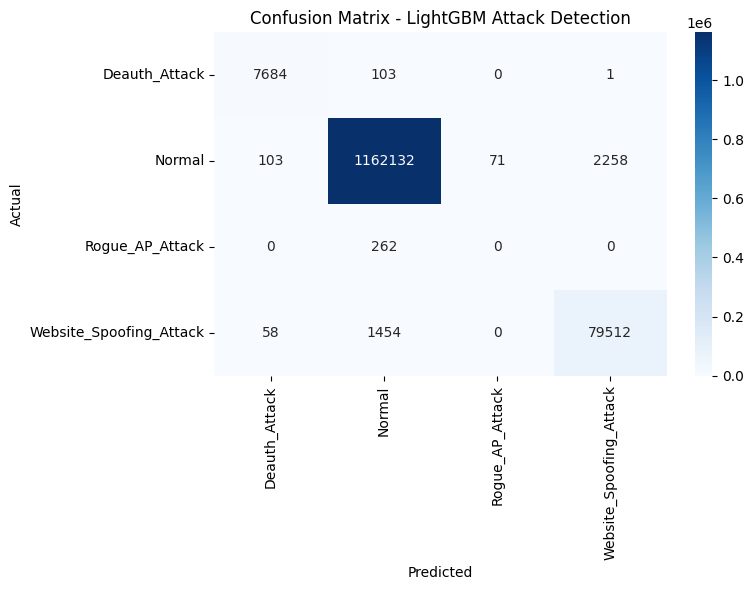

In [32]:

# 🧠 Predictions
y_pred_proba = lgb_model.predict(X_test_reduced)
y_pred_indices = y_pred_proba.argmax(axis=1)
y_pred_labels = le.inverse_transform(y_pred_indices)  # ← Back to "Normal", "Deauth_Attack", etc.

# 📊 Evaluate
print("\n📈 LightGBM Evaluation")
print("Accuracy:", accuracy_score(y_test_merged, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_labels))

# 🌀 Confusion Matrix
plot_confusion_matrix(y_test_merged, y_pred_labels, "LightGBM")

## Conclusion:

the multi-class random forest model gave the best results, and it is the most suitable one for deployment in an IDS that is interested in detecting the 3 specific attacks of: deauth, rogue ap, arp spoofing.